In [17]:
import pandas as pd
from pathlib import Path

In [91]:
#pull clean data
clean_tobbaco_to_load = pd.read_csv("Resources/Clean_Tobacco_data.csv")
countsoftopic= clean_tobbaco_to_load["TopicDesc"].value_counts()
print(countsoftopic)
clean_tobbaco_to_load


Cigarette Use (Adults)            13860
Smokeless Tobacco Use (Adults)    12426
E-Cigarette Use (Adults)           4040
Cessation (Adults)                 2880
Name: TopicDesc, dtype: int64


,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
0,0,2019,National Median (States and DC),Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,60.8,NaN,Overall,All Races,All Ages
1,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
2,2,2019,Florida,Cigarette Use (Adults),Current Smoking,NaN,14.8,15824.0,Overall,All Races,All Ages
3,3,2019,Hawaii,Smokeless Tobacco Use (Adults),Current Use,NaN,2.1,459.0,Overall,All Races,18 to 24 Years
4,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages
...,...,...,...,...,...,...,...,...,...,...,...
33201,33201,2011,California,Cigarette Use (Adults),Smoking Status,Never,62.5,17985.0,Overall,All Races,All Ages
33202,33202,2011,Nevada,Smokeless Tobacco Use (Adults),Current Use,NaN,1.6,2157.0,Overall,All Races,45 to 64 Years
33203,33203,2011,Tennessee,Smokeless Tobacco Use (Adults),Current Use,NaN,11.9,1832.0,Male,All Races,All Ages
33204,33204,2012,Tennessee,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,31.4,203.0,Male,All Races,All Ages


In [114]:
# data frame to block age groups
age_groups_df= pd.DataFrame({"Age":["18 to 24 Years", "25 to 44 Years", "45 to 64 Years","65 Years and Older"]})
age_groups_df

,Age
0,18 to 24 Years
1,25 to 44 Years
2,45 to 64 Years
3,65 Years and Older


In [22]:
# pull data from TopicDesc and Age and remove duplicates 
filtered_tobaccodata = clean_tobbaco_to_load[["TopicDesc","Age"]]



print(filtered_tobaccodata)

                            TopicDesc             Age
0                  Cessation (Adults)        All Ages
1              Cigarette Use (Adults)        All Ages
2              Cigarette Use (Adults)        All Ages
3      Smokeless Tobacco Use (Adults)  18 to 24 Years
4      Smokeless Tobacco Use (Adults)        All Ages
...                               ...             ...
33201          Cigarette Use (Adults)        All Ages
33202  Smokeless Tobacco Use (Adults)  45 to 64 Years
33203  Smokeless Tobacco Use (Adults)        All Ages
33204  Smokeless Tobacco Use (Adults)        All Ages
33205          Cigarette Use (Adults)        All Ages

[33206 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

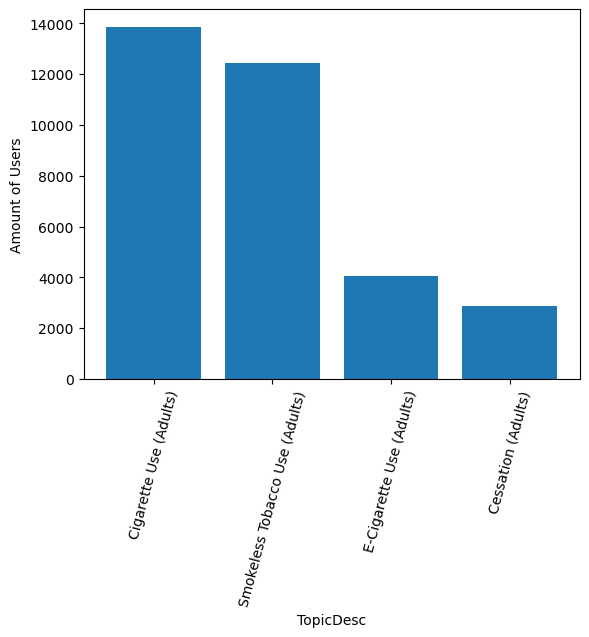

In [23]:
# Generate a bar plot comparing Age and Tobacco Type 
import matplotlib.pyplot as plt
type_tobacco_bar = filtered_tobaccodata["TopicDesc"].value_counts()
plt.bar(type_tobacco_bar.index.values,type_tobacco_bar.values)
plt.xlabel("TopicDesc")
plt.ylabel("Amount of Users")
plt.xticks(rotation=75)
plt.show

In [26]:

finaldataframe= pd.DataFrame({"TopicDesc":["Cigarette Use", "Smokeless Tobacco Use", "E-Cigarette Use", "Cessation"],"Age":["18 to 24 Years", "25 to 44 Years", "45 to 64 Years", "65 Years and Older"]})
finaldataframe


,TopicDesc,Age
0,Cigarette Use,18 to 24 Years
1,Smokeless Tobacco Use,25 to 44 Years
2,E-Cigarette Use,45 to 64 Years
3,Cessation,65 Years and Older


In [25]:
filtered_tobaccodata = clean_tobbaco_to_load[["TopicDesc","Age"]]

filtered_tobaccodata_dedup= filtered_tobaccodata.drop_duplicates()
print(filtered_tobaccodata)

                            TopicDesc             Age
0                  Cessation (Adults)        All Ages
1              Cigarette Use (Adults)        All Ages
2              Cigarette Use (Adults)        All Ages
3      Smokeless Tobacco Use (Adults)  18 to 24 Years
4      Smokeless Tobacco Use (Adults)        All Ages
...                               ...             ...
33201          Cigarette Use (Adults)        All Ages
33202  Smokeless Tobacco Use (Adults)  45 to 64 Years
33203  Smokeless Tobacco Use (Adults)        All Ages
33204  Smokeless Tobacco Use (Adults)        All Ages
33205          Cigarette Use (Adults)        All Ages

[33206 rows x 2 columns]


In [34]:
import matplotlib.pyplot as plt

scat_plot= filtered_tobaccodata.groupby(["Data_Value"]).mean()
plt.scatter(scat_plot["TopicDesc"], scat_plot["Age"])
plt.xlabel("TopicDesc")
plt.ylabel("Age")
plt.show()

KeyError: 'Data_Value'

Cigarette Use (Adults)            8613
Smokeless Tobacco Use (Adults)    7179
Cessation (Adults)                2880
E-Cigarette Use (Adults)          2511
Name: TopicDesc, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

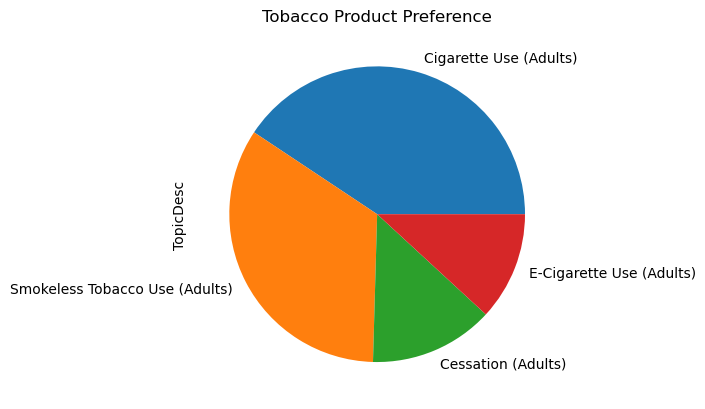

In [92]:
# Pie Chart showing tobacco preference by all ages 
import matplotlib.pyplot as plt

Allages= clean_tobbaco_to_load[clean_tobbaco_to_load["Age"]=="All Ages"]

#group by tobacco product
productpref= Allages.groupby("TopicDesc")
#create pie chart 
productpref=Allages["TopicDesc"].value_counts()
productpref.plot(kind="pie")
plt.title("Tobacco Product Preference")
print(productpref)
plt.show

Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

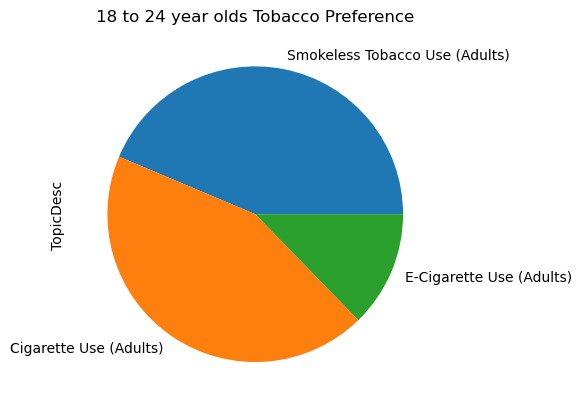

In [125]:
# Pie Chart showing tobacco preference by all ages 
group1= clean_tobbaco_to_load[clean_tobbaco_to_load["Age"]=="18 to 24 Years"]

#group by tobacco product
#productpref= group1.groupby("TopicDesc")
#create pie chart 
productpref=group1["TopicDesc"].value_counts()
productpref.plot(kind="pie")
plt.title("18 to 24 year olds Tobacco Preference")
print(productpref)
plt.show

Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

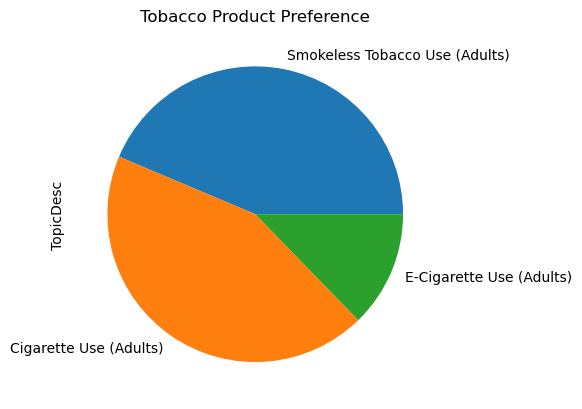

In [87]:
# Pie Chart showing tobacco preference by all ages 
import matplotlib.pyplot as plt

group2= clean_tobbaco_to_load[clean_tobbaco_to_load["Age"]=="45 to 64 Years"]

#group by tobacco product
#productpref= group2.groupby("TopicDesc")
#create pie chart 
productpref=group2["TopicDesc"].value_counts()
productpref.plot(kind="pie")
plt.title("Tobacco Product Preference")
print(productpref)
plt.show

In [69]:
import scipy.stats as stats
critical_value= stats.chi2.ppf(q=.95, df=1)

#critical value
critical_value


3.841458820694124

In [80]:
ChiSquaredata = clean_tobbaco_to_load[["MeasureDesc","Gender","YEAR"]]
print(ChiSquaredata)


                                        MeasureDesc   Gender  YEAR
0      Percent of Former Smokers Among Ever Smokers  Overall  2019
1                                 Smoking Frequency   Female  2019
2                                   Current Smoking  Overall  2019
3                                       Current Use  Overall  2019
4                                       User Status     Male  2019
...                                             ...      ...   ...
33201                                Smoking Status  Overall  2011
33202                                   Current Use  Overall  2011
33203                                   Current Use     Male  2011
33204                              Frequency of Use     Male  2012
33205                               Current Smoking  Overall  2011

[33206 rows x 3 columns]


Empty DataFrame
Columns: [Unnamed: 0, YEAR, LocationDesc, TopicDesc, MeasureDesc, Response, Data_Value, Sample_Size, Gender, Race, Age]
Index: []


Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

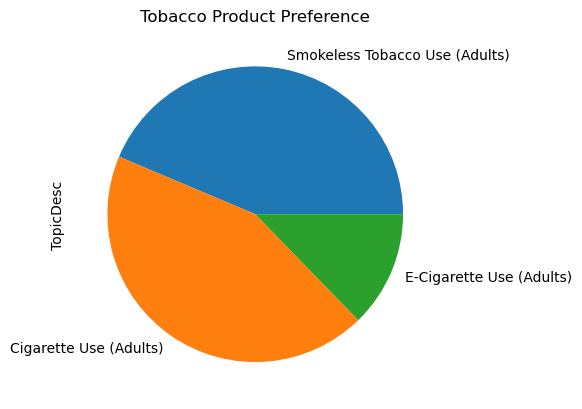

In [89]:
import matplotlib.pyplot as plt

group2= clean_tobbaco_to_load[clean_tobbaco_to_load["Age"]=="25 to 44 Years"]

#group by tobacco product
#productpref= group2.groupby("TopicDesc")
#create pie chart 
productpref=group2["TopicDesc"].value_counts()
productpref.plot(kind="pie")
plt.title("Tobacco Product Preference")
print(productpref)
plt.show

In [94]:
clean_tobbaco_to_load.head()

,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
0,0,2019,National Median (States and DC),Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,60.8,NaN,Overall,All Races,All Ages
1,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
2,2,2019,Florida,Cigarette Use (Adults),Current Smoking,NaN,14.8,15824.0,Overall,All Races,All Ages
3,3,2019,Hawaii,Smokeless Tobacco Use (Adults),Current Use,NaN,2.1,459.0,Overall,All Races,18 to 24 Years
4,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages


In [98]:
for group in clean_tobbaco_to_load['Age'].unique():
    subset = clean_tobbaco_to_load[clean_tobbaco_to_load['Age'] == group]
    print(subset['TopicDesc'].value_counts())

Cigarette Use (Adults)            8613
Smokeless Tobacco Use (Adults)    7179
Cessation (Adults)                2880
E-Cigarette Use (Adults)          2511
Name: TopicDesc, dtype: int64
Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64
Smokeless Tobacco Use (Adults)    1431
Cigarette Use (Adults)            1431
E-Cigarette Use (Adults)           417
Name: TopicDesc, dtype: int64
Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64
Smokeless Tobacco Use (Adults)    1431
Cigarette Use (Adults)            1431
E-Cigarette Use (Adults)           417
Name: TopicDesc, dtype: int64
Cigarette Use (Adults)            477
Smokeless Tobacco Use (Adults)    477
E-Cigarette Use (Adults)          139
Name: TopicDesc, dtype: int64
Smokeless Tobacco Use (Adults)    477
Cigarette Use (Adults)            477
E-Cigarette 

ValueError: could not convert string to float: 'age_18_24'

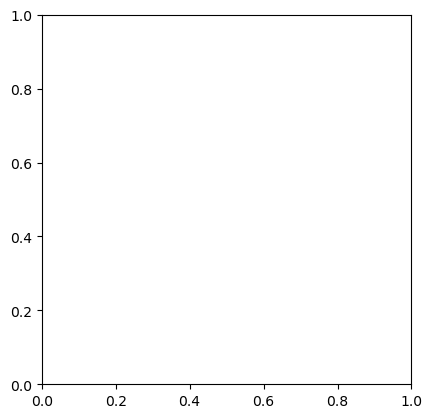

In [124]:
#Cigarette piechart
import matplotlib.pyplot as plt

cig_use= clean_tobbaco_to_load[clean_tobbaco_to_load["TopicDesc"]=="Cigarette Use (Adults)"]



#group by Age
age_18_24=cig_use[cig_use["Age"]== "18 to 24 Years"]
age_25_44=cig_use[cig_use["Age"]=="25 to 44 Years"]
age_45_64=cig_use[cig_use["Age"]=="45 to 64 Years"]
age_65_plus=cig_use[cig_use["Age"]=="65 Years and Older"]

#create pie chart 
labels=["18-24 Years", "25 to 44 Years", "45 to 64 Years", "65 Years and Older"]
values=["age_18_24","age_25_44","age_45_64","age_65_plus"]
plt.pie(values, cig_use)
plt.title("Cigarette Users (Adults) by Age Group")
print(productpref)
plt.show

In [115]:
#Cigarette piechart
import matplotlib.pyplot as plt

cig_use= clean_tobbaco_to_load[clean_tobbaco_to_load["TopicDesc"]=="E-Cigarette Use (Adults)"]


#group by tobacco product

#create pie chart 
productpref=cig_use["age_groups_df"].value_counts()
productpref.plot(kind="pie")
plt.title("Cigarette Users (Adults) by Age Group")
print(productpref)
plt.show

KeyError: 'age_groups_df'